<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/cda-2022/blob/main/notebooks/cda_6_ca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup 

Setup Python

In [ ]:
## we need to install github version of this package
!pip install git+https://github.com/MaxHalford/Prince

In [2]:
import pandas as pd
import prince 

Setup R

In [20]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("ca")

In [22]:
%%R
library(ca)

Setup Julia

In [ ]:
%%bash
wget -q https://julialang-s3.julialang.org/bin/linux/x64/1.7/julia-1.7.2-linux-x86_64.tar.gz
tar zxvf julia-1.7.2-linux-x86_64.tar.gz
## python's module
pip install julia

In [30]:
import julia
julia.install(julia = "/content/julia-1.7.2/bin/julia")
from julia import Julia
jl = Julia(runtime="/content/julia-1.7.2/bin/julia",compiled_modules=False)
%load_ext julia.magic


Precompiling PyCall...
Precompiling PyCall... DONE
PyCall is installed and built successfully.

PyCall is setup for non-default Julia runtime (executable) `/content/julia-1.7.2/bin/julia`.
To use this Julia runtime, PyJulia has to be initialized first by
    from julia import Julia
    Julia(runtime='/content/julia-1.7.2/bin/julia')


Initializing Julia interpreter. This may take some time...


/usr/local/lib/python3.7/dist-packages/julia/magic.py:166: UserWarning: Incompatible upstream libraries. Got ImportError: No module named 'prompt_toolkit.lexers'
  warnings.warn(template.format(err))
/usr/local/lib/python3.7/dist-packages/julia/magic.py:174: UserWarning: Incompatible upstream libraries. Got ImportError: cannot import name 'Completion' from 'IPython.core.completer' (/usr/local/lib/python3.7/dist-packages/IPython/core/completer.py)
  warnings.warn(template.format(err))


In [ ]:
%%julia
using Pkg
Pkg.add("Plots")
Pkg.add("StatsBase")
Pkg.add("DataFrames")

In [49]:
%%julia
using LinearAlgebra
using Plots
using DataFrames
rowSums(x) = sum(x, dims = 2);
colSums(x) = sum(x, dims = 1);

### Solution in Python

data

In [3]:
X = pd.DataFrame(
    data=[
          [1933, 1175, 1186],
          [646, 579, 671],
          [707, 780, 767],
          [768, 962, 1126]
          ],
          columns=pd.Series(["Realised", "Refusals", "Errors"]),
          index=pd.Series(['Rural', 'city 20k', 'city 20k-100k', 'city 100k+'])
          )
X

,Realised,Refusals,Errors
Rural,1933,1175,1186
city 20k,646,579,671
city 20k-100k,707,780,767
city 100k+,768,962,1126


main function

In [4]:
ca = prince.CA(n_components=2)
fitted_ca = ca.fit(X)

Principal inertias (eigenvalues):

In [11]:
pd.DataFrame({"eigenvalues" : fitted_ca.eigenvalues_,
              "percentage": fitted_ca.explained_inertia_})

,eigenvalues,percentage
0,0.025020,0.974227
1,0.000662,0.025773


Row and column masses

In [14]:
fitted_ca.row_masses_

Rural            0.380000
city 20k         0.167788
city 20k-100k    0.199469
city 100k+       0.252743
dtype: float64

In [15]:
fitted_ca.row_masses_

Rural            0.380000
city 20k         0.167788
city 20k-100k    0.199469
city 100k+       0.252743
dtype: float64

Contributions to dimensions

In [17]:
fitted_ca.row_contributions()

,0,1
Rural,0.558114,0.002483
city 20k,0.011356,0.185119
city 20k-100k,0.062987,0.701798
city 100k+,0.367543,0.110601


In [19]:
fitted_ca.column_contributions()

,0,1
Realised,0.632050,0.009189
Refusals,0.106887,0.583733
Errors,0.261063,0.407078


Plot

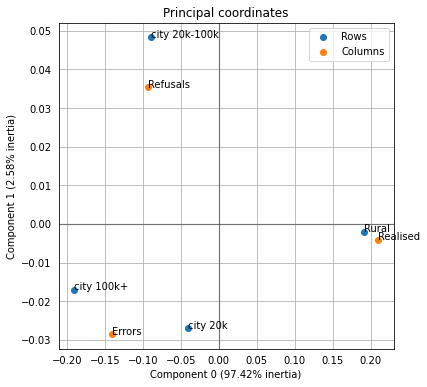

In [ ]:
ca.plot_coordinates(
    X=X,
    ax=None,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True)

### Solution in R

In [24]:
%%R
data <- matrix(data = c(1933, 1175, 1186, 646, 579, 671, 707, 780, 767,768, 962, 1126), 
               ncol = 3, byrow = TRUE)
rownames(data) <- c("rural","c20","c20_100","c100")
colnames(data) <- c("realized","refused","errors")
data

        realized refused errors
rural       1933    1175   1186
c20          646     579    671
c20_100      707     780    767
c100         768     962   1126


In [26]:
%%R
fitted_ca <- ca(data)
fitted_ca


 Principal inertias (eigenvalues):
           1       2       
Value      0.02502 0.000662
Percentage 97.42%  2.58%   


 Rows:
            rural       c20  c20_100      c100
Mass     0.380000  0.167788 0.199469  0.252743
ChiDist  0.191706  0.049230 0.101139  0.191503
Inertia  0.013965  0.000407 0.002040  0.009269
Dim. 1  -1.211908  0.260156 0.561935  1.205908
Dim. 2  -0.080827 -1.050377 1.875721 -0.661515


 Columns:
         realized  refused    errors
Mass     0.358761 0.309381  0.331858
ChiDist  0.209989 0.099462  0.143158
Inertia  0.015820 0.003061  0.006801
Dim. 1  -1.327312 0.587780  0.886945
Dim. 2  -0.160041 1.373601 -1.107548


In [27]:
%%R
summary(fitted_ca)


Principal inertias (eigenvalues):

 dim    value      %   cum%   scree plot               
 1      0.025020  97.4  97.4  ************************ 
 2      0.000662   2.6 100.0  *                        
        -------- -----                                 
 Total: 0.025681 100.0                                 


Rows:
    name   mass  qlt  inr    k=1  cor ctr    k=2 cor ctr  
1 | rurl |  380 1000  544 | -192 1000 558 |   -2   0   2 |
2 |  c20 |  168 1000   16 |   41  699  11 |  -27 301 185 |
3 | c20_ |  199 1000   79 |   89  772  63 |   48 228 702 |
4 | c100 |  253 1000  361 |  191  992 368 |  -17   8 111 |

Columns:
    name   mass  qlt  inr    k=1  cor ctr    k=2 cor ctr  
1 | rlzd |  359 1000  616 | -210 1000 632 |   -4   0   9 |
2 | rfsd |  309 1000  119 |   93  874 107 |   35 126 584 |
3 | errr |  332 1000  265 |  140  960 261 |  -28  40 407 |


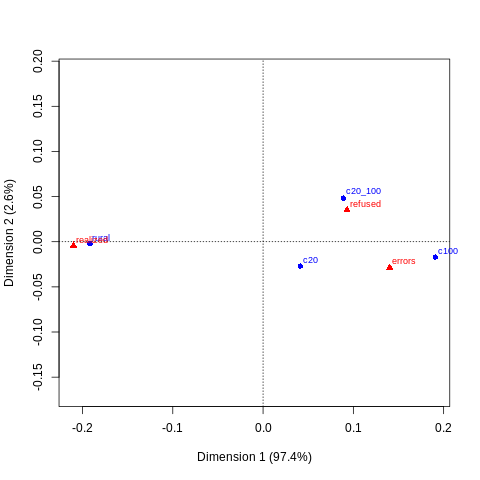

In [28]:
%%R
plot(fitted_ca)

### Solution in Julia

There's no function for CA in Julia so we need to develop our own.

In [35]:
%%julia
function ca(m)
    P = m/sum(m);
    r = rowSums(P); ## rowsums
    c = colSums(P); ## colsums
    Dr = Diagonal(r[:]); ## diagm(0 => r[:]); dense matrix
    Dc  = Diagonal(c[:]); ## diagm(0 => c[:]); dense matrix
    A = Dr^(-0.5)*(P - r*c)*Dc^(-0.5)
    U,Γ,V=svd(A);
    X = Dr^(-1/2) * U * Diagonal(Γ) 
    Y = Dc^(-1/2) * V * Diagonal(Γ)
    return(X, Y)
end

<PyCall.jlwrap ca>

In [36]:
%%julia
m = [1933 1175 1186;
     646 579 671;
     707 780 767;
     768 962 1126]

array([[1933, 1175, 1186],
       [ 646,  579,  671],
       [ 707,  780,  767],
       [ 768,  962, 1126]], dtype=int64)

In [41]:
%%julia
X,Y=ca(m);
println("---------- row coords ----------")
println(X[:,1:2])
println("---------- col coords ----------")
println(Y[:,1:2])

]---------- row coords ----------
[-0.19169441439217788 -0.0020794537459330573; 0.041150421679717296 -0.027023131502777537; 0.0888845191795802 0.048256824784295396; 0.19074541654919247 -0.0170188555145307]
---------- col coords ----------
[-0.20994852661622657 -0.004117381503035959; 0.09297255442552536 0.035338745368908034; 0.1402931404348125 -0.0284939704523718]


In [43]:
%%julia
res = DataFrame(vcat(X[:,1:2], Y[:,1:2]), :auto);
res.label = ["Rural", "city 20k", "city 20k-100k", "city 100k+", "Realised","Refusals","Errors"];
res.color = ["red", "red", "red", "red", "blue","blue","blue"];
res

<PyCall.jlwrap 7×4 DataFrame
 Row │ x1          x2           label          color
     │ Float64     Float64      String         String
─────┼────────────────────────────────────────────────
   1 │ -0.191694   -0.00207945  Rural          red
   2 │  0.0411504  -0.0270231   city 20k       red
   3 │  0.0888845   0.0482568   city 20k-100k  red
   4 │  0.190745   -0.0170189   city 100k+     red
   5 │ -0.209949   -0.00411738  Realised       blue
   6 │  0.0929726   0.0353387   Refusals       blue
   7 │  0.140293   -0.028494    Errors         blue>

In [ ]:
%%julia
scatter(res.x1, res.x2, text = res.label, color = res.color)